In [2]:
from neural_network import NeuralNetwork
from digits_manager import DigitsDataset
import numpy as np
import pandas as pd

In [34]:
digitsCls = DigitsDataset()
dataset = digitsCls.get_dataset()
np.random.shuffle(dataset)

nn = NeuralNetwork(
    nn_structure=[64,64,10],
    learning_rate=0.01,
    epochs_num=10,
    dataset=dataset
)

while nn.train_step():
    pass

print("Training completed.")

corr_sum = 0
index = 0
test_samples_amt = len(nn.get_test_set())
while index < test_samples_amt-1:
    index = nn.get_current_test_sample_index()
    sample, target = nn.get_test_set()[index - 1]
    while nn.predict_step(sample):
        pass
    prediction = nn.get_last_prediction()
    
    predicted_label = np.argmax(prediction)
    actual_label = np.argmax(target)
    if predicted_label == actual_label:
        corr_sum += 1
    
    print(f"Sample index: {index}, Predicted: {predicted_label}, Actual: {actual_label}, Correct so far: {corr_sum*100/test_samples_amt:.2f}%")

Epoch 0 completed. Error: 1.548
Epoch 1 completed. Error: 0.623
Epoch 2 completed. Error: 0.381
Epoch 3 completed. Error: 0.292
Epoch 4 completed. Error: 0.243
Epoch 5 completed. Error: 0.212
Epoch 6 completed. Error: 0.190
Epoch 7 completed. Error: 0.173
Epoch 8 completed. Error: 0.160
Epoch 9 completed. Error: 0.150
Network trained!
Training completed.
Sample index: 0, Predicted: 5, Actual: 5, Correct so far: 0.28%
Sample index: 1, Predicted: 5, Actual: 5, Correct so far: 0.56%
Sample index: 2, Predicted: 7, Actual: 8, Correct so far: 0.56%
Sample index: 3, Predicted: 1, Actual: 1, Correct so far: 0.83%
Sample index: 4, Predicted: 4, Actual: 4, Correct so far: 1.11%
Sample index: 5, Predicted: 6, Actual: 6, Correct so far: 1.39%
Sample index: 6, Predicted: 7, Actual: 7, Correct so far: 1.67%
Sample index: 7, Predicted: 6, Actual: 6, Correct so far: 1.94%
Sample index: 8, Predicted: 0, Actual: 0, Correct so far: 2.22%
Sample index: 9, Predicted: 3, Actual: 3, Correct so far: 2.50%
Sam

In [4]:
STRUCTURE = [64,32,10]
LR = 0.01
EPOCHS_AMT = 10
REPS = 100

SEED = 42
np.random.seed(SEED)

In [ ]:
def run_single_test():
    digitsCls = DigitsDataset()
    dataset = digitsCls.get_dataset()
    np.random.shuffle(dataset)

    nn = NeuralNetwork(
        nn_structure=STRUCTURE,
        learning_rate=LR,
        epochs_num=EPOCHS_AMT,
        dataset=dataset
    )
    
    train_samples_amt = len(nn.get_train_set()) 
    state, _ = nn.get_state()

    accuracies = []
    
    while state != "TRAINED":
        con_training = True
        while con_training and nn.train_step():
            state, _ = nn.get_state()
            
            if nn.get_current_train_sample_index() == train_samples_amt - 1 and state == "NEW_SAMPLE":
                con_training = False

        state, _ = nn.get_state()
        if state == "TRAINED":
            return accuracies
        
        corr_sum = 0
        index = 0
        test_samples_amt = len(nn.get_test_set())
        while index < test_samples_amt-1:
            index = nn.get_current_test_sample_index()
            sample, target = nn.get_test_set()[index - 1]
            while nn.predict_step(sample):
                pass
            prediction = nn.get_last_prediction()
            
            predicted_label = np.argmax(prediction)
            actual_label = np.argmax(target)
            if predicted_label == actual_label:
                corr_sum += 1
        accuracies.append(corr_sum*100/test_samples_amt)
        print(f"Accuracy: {corr_sum*100/test_samples_amt:.2f}%")
        
        
    return accuracies
all_accuracies = []
for rep in range(REPS):
    print(f"--- REPETITION {rep+1} ---")
    accuracies = run_single_test()
    print(accuracies)
    all_accuracies.append(accuracies)
    df = pd.DataFrame(all_accuracies)
    #df.to_csv("./../test_res/test_results.csv", header=[f"epoch_{i+1}_acc" for i in range(len(accuracies))], index=False)

--- REPETITION 1 ---
Accuracy: 71.94%
Epoch 0 completed. Error: 1.851
Accuracy: 89.17%
Epoch 1 completed. Error: 0.912
Accuracy: 91.39%
Epoch 2 completed. Error: 0.491
Accuracy: 93.06%
Epoch 3 completed. Error: 0.352
Accuracy: 93.06%
Epoch 4 completed. Error: 0.284
Accuracy: 93.33%
Epoch 5 completed. Error: 0.243
Accuracy: 93.89%
Epoch 6 completed. Error: 0.215
Accuracy: 93.89%
Epoch 7 completed. Error: 0.195
Accuracy: 94.44%
Epoch 8 completed. Error: 0.179
Accuracy: 95.00%
Epoch 9 completed. Error: 0.167
Network trained!
[71.94444444444444, 89.16666666666667, 91.38888888888889, 93.05555555555556, 93.05555555555556, 93.33333333333333, 93.88888888888889, 93.88888888888889, 94.44444444444444, 95.0]
--- REPETITION 2 ---
Accuracy: 74.17%
Epoch 0 completed. Error: 1.803
Accuracy: 88.06%
Epoch 1 completed. Error: 0.875
Accuracy: 91.39%
Epoch 2 completed. Error: 0.475
Accuracy: 92.78%
Epoch 3 completed. Error: 0.340
Accuracy: 93.06%
Epoch 4 completed. Error: 0.273
Accuracy: 93.33%
Epoch 5 com

+--------------+-------+-------------------+--------------------+
|              | Epoch |   Mean Accuracy   |      Std Dev       |
+--------------+-------+-------------------+--------------------+
| epoch_1_acc  |  1.0  | 71.80833333333334 | 6.839042421789638  |
| epoch_2_acc  |  2.0  | 88.01944444444445 | 2.6074774128764155 |
| epoch_3_acc  |  3.0  | 91.45555555555555 | 1.4485609993021833 |
| epoch_4_acc  |  4.0  | 92.76111111111113 | 1.2737456510383434 |
| epoch_5_acc  |  5.0  | 93.54166666666666 | 1.212011604191295  |
| epoch_6_acc  |  6.0  | 94.0777777777778  | 1.203949728807206  |
| epoch_7_acc  |  7.0  | 94.51666666666664 | 1.1378790245005423 |
| epoch_8_acc  |  8.0  | 94.82499999999999 | 1.1447319384354449 |
| epoch_9_acc  |  9.0  | 95.13888888888889 | 1.190028508630375  |
| epoch_10_acc | 10.0  | 95.35000000000002 | 1.1742843601842718 |
+--------------+-------+-------------------+--------------------+


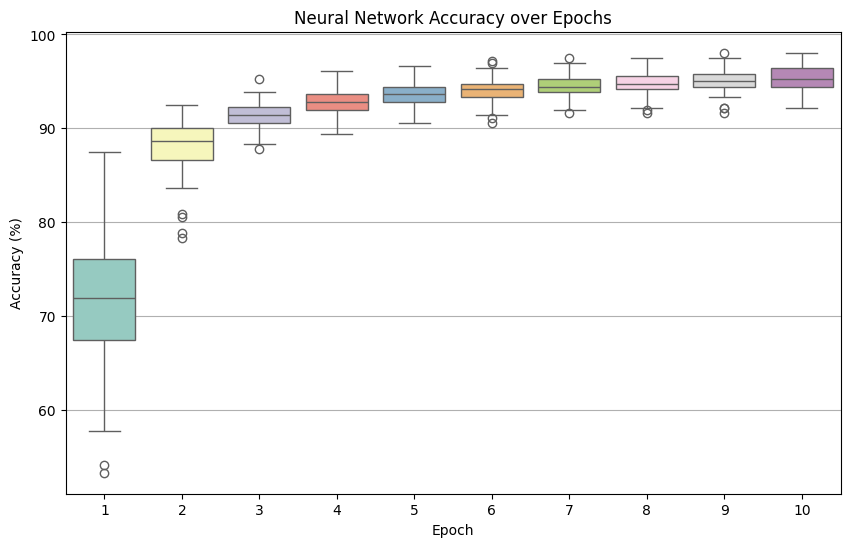

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

df = pd.read_csv("./../test_res/test_results.csv")
X = range(0, EPOCHS_AMT)

plt.figure(figsize=(10,6))
sns.boxplot(data=df, palette="Set3")
plt.xticks(ticks=X, labels=[str(x+1) for x in X])
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.title("Neural Network Accuracy over Epochs")
plt.grid(axis='y')

summary_df = pd.DataFrame({
    "Epoch": range(1, EPOCHS_AMT+1),
    "Mean Accuracy": df.mean(),
    "Std Dev": df.std()
})
print(tabulate(summary_df, headers='keys', tablefmt='pretty', floatfmt=".2f"))
summary_df.to_csv("./../test_res/summary_results.csv", index=False)

